# Decision Trees

#### What is a Decision Tree?

A Decision Tree is a supervised machine learning algorithm that is used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the most significant attribute(s) at each level, making the decision at every node.

Visually, a decision tree is a flowchart-like structure where:
- **Node**: Represents a feature or attribute.
- **Branch**: Represents a decision rule.
- **Leaf**: Represents an outcome (class label or continuous value).

#### How Does It Work?

1. **Selection of attribute**: At every node, the tree selects the attribute that provides the best split, i.e., the one that best separates the data into distinct classes or values based on a certain criterion.
   
2. **Making a decision**: The dataset is then split into subsets based on the chosen attribute. This process is recursively repeated, leading to a decision at every node until one of the stopping conditions is met.

3. **Stopping Conditions**: The tree stops growing when one of these conditions is met:
    - All instances in a node belong to the same class.
    - There are no more attributes left to split upon.
    - The tree reaches a predefined depth.
    - The number of instances in a node is below a predefined threshold.

#### Evaluation Metrics

The decision on which attribute to split upon at each node is based on a criterion. Common criteria include:

- **Gini Impurity**: Measures the disorder of a set of instances. It's used by the CART (Classification and Regression Trees) algorithm for classification tasks.
- **Information Gain**: Based on the concept of entropy from information theory. It measures the reduction in randomness achieved by partitioning a dataset according to a given attribute.
- **Mean Squared Error (MSE)**: Used for regression tasks. It measures the average squared differences between the actual and predicted values.

#### Advantages of Decision Trees

- **Interpretability**: Trees can be visualized, which makes them easy to understand and interpret.
- **Minimal Data Preprocessing**: They require less data preprocessing, e.g., no need for scaling.
- **Handle both numerical and categorical data**: Can be used for both regression and classification tasks.
- **Non-parametric**: Makes no assumptions about the underlying data distribution.

#### Disadvantages of Decision Trees

- **Overfitting**: Without proper constraints, trees can become overly complex and fit the noise in the data.
- **Variance**: Small changes in the data can result in a different tree.
- **Biased to dominant classes**: Trees can be biased if one class dominates the dataset.

### Gini Index (or Gini Impurity) as a Splitting Criterion

#### Gini Index for Binary Classification

The Gini index (or Gini impurity) measures the impurity or disorder of a set. It's calculated as:

$$
\text{Gini}(D) = 1 - \sum_{i=1}^{m} p_i^2
$$

where $ p_i $ is the proportion of samples that belong to class $ i $ in the dataset $ D $, and $ m $ is the number of classes.

For a binary classification problem, $ m = 2 $, so we have two classes: class 0 and class 1. Let's denote $ p $ as the proportion of samples that belong to class 1. Therefore, the proportion of samples that belong to class 0 is $ 1 - p $.

Substituting these values into the formula, we get:

$$
\text{Gini}(D) = 1 - (p^2 + (1-p)^2)
$$

Now, let's find the range of possible Gini values:

1. **Minimum Gini Index**: This occurs when all instances in $ D $ belong to a single class. In this case, either $ p = 0 $ or $ p = 1 $. The Gini index would be $ 0 $, indicating perfect purity.
2. **Maximum Gini Index**: This occurs when the instances are evenly distributed between the two classes, i.e., $ p = 0.5 $. The Gini index in this case would be $ 0.5 $, indicating maximum impurity or disorder.

Thus, for a binary classification problem, the Gini index can take on values in the range $[0, 0.5]$.

#### Gini Index for Multi-class Classification
For a multi-class classification problem, the Gini index is still calculated using the formula:

$$
\text{Gini}(D) = 1 - \sum_{i=1}^{m} p_i^2
$$

where $ p_i $ is the proportion of samples that belong to class $ i $ in the dataset $ D $, and $ m $ is the number of classes.

**Range of Gini Index for Multi-class Classification**:

1. **Minimum Gini Index**: This occurs when all instances in $ D $ belong to a single class. Regardless of the number of classes, if all instances belong to one class, the Gini index will be $ 0 $, indicating perfect purity.

2. **Maximum Gini Index**: The Gini index is maximized when the instances are evenly distributed across all classes. Let's consider the scenario where all classes have equal proportions:

For $ m $ classes, each class would have a proportion of $ \frac{1}{m} $. 

Thus, the maximum Gini impurity can be found when:

$$
\text{Gini}_{\text{max}}(D) = 1 - m \times \left(\frac{1}{m}\right)^2 = 1 - \frac{1}{m}
$$

So, for a multi-class classification problem with $ m $ classes, the Gini index can take on values in the range $[0, 1 - \frac{1}{m}]$. 

For example:
- For a 3-class problem, the maximum Gini impurity is $ 1 - \frac{1}{3} = \frac{2}{3} $.
- For a 4-class problem, the maximum Gini impurity is $ 1 - \frac{1}{4} = \frac{3}{4} $.
- And so on. 

As the number of classes increases, the maximum possible Gini impurity gets closer and closer to 1, but never actually reaches it.

### Information Gain as a Splitting Criterion

#### What is Information Gain?

Information Gain (IG) measures how much information a feature gives us about the class. It is a popular criterion used by algorithms like the ID3, C4.5, and C5.0 for building decision trees. The idea is to choose the attribute that returns the highest information gain for a decision tree split.

#### How is it Computed?

Information Gain is calculated as the difference between the entropy of the original set and the weighted entropy of the subsets created after the split.

1. **Entropy**: Entropy measures the impurity or disorder in a set. For a binary classification, entropy is defined as:

$$
\text{Entropy}(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-)
$$

Where $ p_+ $ is the proportion of positive examples in $ S $ and $ p_- $ is the proportion of negative examples.

For multi-class classification:

$$
\text{Entropy}(S) = -\sum_{i=1}^{m} p_i \log_2(p_i)
$$

Where $ m $ is the number of classes and $ p_i $ is the proportion of instances of class $ i $.

2. **Weighted Entropy**: After a split, we compute the entropy for each subset and take a weighted average of those entropies, based on the size of the subsets.

3. **Information Gain**: Finally, the Information Gain is computed as:

$$
\text{IG}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v)
$$

Where $ A $ is the attribute for the split, $ \text{Values}(A) $ are the possible values of attribute $ A $, and $ S_v $ is the subset of $ S $ where attribute $ A $ has value $ v $.

#### Example

Consider a simple dataset with 10 instances, where 5 are positive (labeled as `+`) and 5 are negative (labeled as `-`). If we want to split this dataset based on a feature $ A $ that has two values $ a_1 $ and $ a_2 $, and the resulting subsets are:
- $ S_{a_1} $: 4 positive, 1 negative
- $ S_{a_2} $: 1 positive, 4 negative

Original entropy:

$$
\text{Entropy}(S) = -0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 1
$$

Entropy after the split:

$$
\text{Entropy}(S_{a_1}) = -\frac{4}{5} \log_2\left(\frac{4}{5}\right) - \frac{1}{5} \log_2\left(\frac{1}{5}\right)
$$
$$
\text{Entropy}(S_{a_2}) = -\frac{1}{5} \log_2\left(\frac{1}{5}\right) - \frac{4}{5} \log_2\left(\frac{4}{5}\right)
$$

Weighted average of the entropies:

$$
\text{Weighted Entropy} = \frac{5}{10} \text{Entropy}(S_{a_1}) + \frac{5}{10} \text{Entropy}(S_{a_2})
$$

Finally, the Information Gain:

$$
\text{IG}(S, A) = \text{Entropy}(S) - \text{Weighted Entropy}
$$

If the Information Gain is high, feature $ A $ is considered a good attribute for the split.

#### Why use Information Gain?

Information Gain helps to determine which feature splits the data best by measuring the reduction in randomness. Attributes that provide the most significant reduction in entropy are preferred as they help in making clearer decisions.

#### Limitations of Information Gain

1. **Bias Towards Multi-valued Attributes**: Information Gain tends to favor attributes with more values since they can result in more partitions and, potentially, smaller subsets, even if they might not be useful.
2. **Overfitting**: High Information Gain can sometimes lead to overfitting, especially if nodes are split on attributes having minimal importance.


### Gini Index vs. Information Gain

#### Definition:

- **Gini Index (Gini Impurity)**:
  - Represents the probability of a random sample being classified incorrectly if we randomly pick a label according to the distribution in the branch.
  - Formula for a binary classification: $ \text{Gini}(D) = 1 - [p_+^2 + p_-^2] $
  
- **Information Gain**:
  - Based on the concept of entropy, which measures the impurity or disorder in a set.
  - Information Gain is the reduction in entropy achieved by partitioning the data based on an attribute.
  - Formula: $ \text{IG}(S, A) = \text{Entropy}(S) - \text{Weighted Sum of Entropy of Each Branch} $

#### Advantages:

- **Gini Index**:
  - Simpler to compute than Information Gain, especially when the number of classes is large.
  - Less biased towards multi-valued attributes.
  
- **Information Gain**:
  - Provides a clear measure of the effectiveness of an attribute in classifying data based on entropy.

#### Disadvantages:

- **Gini Index**:
  - In cases where the Gini Index values are very similar for different attributes, small changes in data distributions can lead to different trees.
  
- **Information Gain**:
  - Biased towards multi-valued attributes.
  - Computationally more intensive due to the calculation of logarithms.
  - Can lead to overfitting if it results in many small branches based on attributes that aren't essential for classification.

### Decision Trees in Scikit-Learn Demo

In [1]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


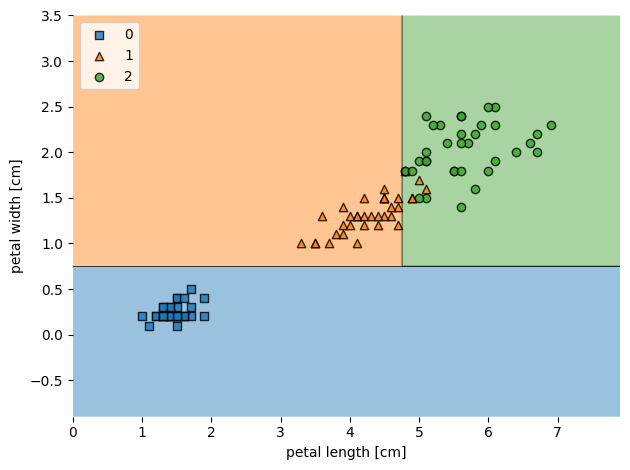

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train, y_train)


plot_decision_regions(X_train, y_train, tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

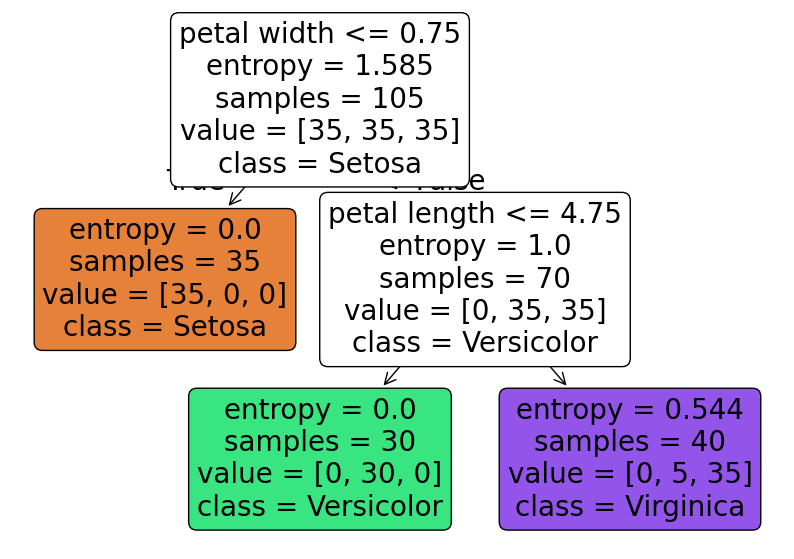

In [5]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

## Regression Trees

Now let's try fitting a **regression tree** to the `Boston` data set from the `MASS` library. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per \$10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

First, we create a training set, and fit the tree to the training data using `medv` (median home value) as our response:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

boston_df = pd.read_csv('data/Boston.csv').drop('Unnamed: 0', axis=1)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
X = boston_df.drop('medv', axis = 1)
y = boston_df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Pruning not supported. Choosing max depth 2)
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


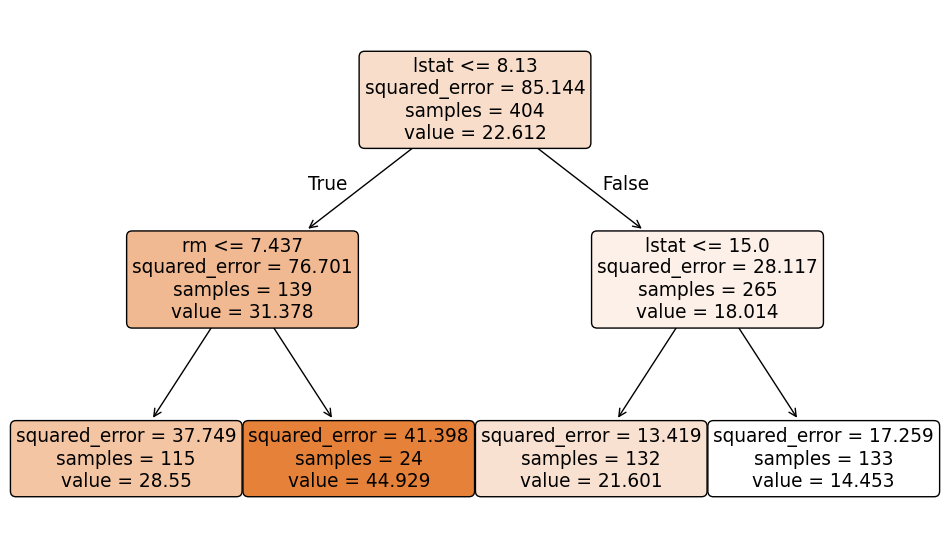

In [8]:
plt.figure(figsize=(12, 7))
plot_tree(regr_tree_boston, 
          filled=True, 
          rounded=True,
          feature_names=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 
                         'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']) 
plt.show()